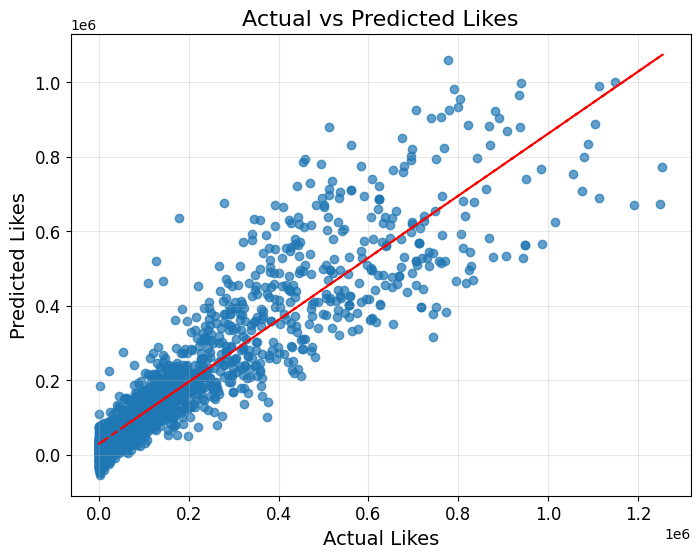

R²: 0.8337887805410206


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# load your dataset into a pandas DataFrame
data = pd.read_csv('correlated.csv')

# calculate the IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# determine the fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# identify outliers
outliers = ((data < lower_fence) | (data > upper_fence)).any(axis=1)

# remove outliers from the dataset
data = data[~outliers]

if data.isnull().values.any():
    print('Warning: input data contains missing values')
    data = data.dropna()  # Drop rows with missing values

# split the data into train and test sets with 20% for the test set
X = data.drop('Likes', axis=1)
y = data['Likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = Ridge()
model.fit(X_train, y_train)

# predict the test set results
y_pred = model.predict(X_test)

# plot the actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Likes', fontsize=14)
plt.ylabel('Predicted Likes', fontsize=14)
plt.title('Actual vs Predicted Likes', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)

# plot the fitted line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), 'r--')

plt.show()

r2 = model.score(X_test, y_test)
print('R²:', r2)



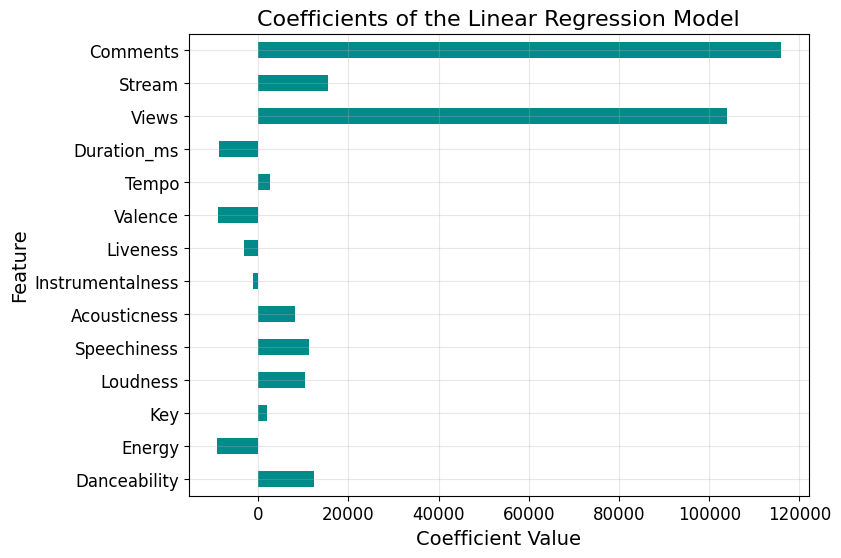

Root Mean Squared Error: 90998.30


In [37]:
# plot the coefficients
coef = pd.Series(model.coef_, index=X.columns)
coef.plot(kind='barh', figsize=(8, 6), color='darkcyan')
plt.title('Coefficients of the Linear Regression Model', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.show()
# predict the test set results
y_pred = model.predict(X_test)

# calculate the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

# print the RMSE
print(f"Root Mean Squared Error: {rmse:.2f}")


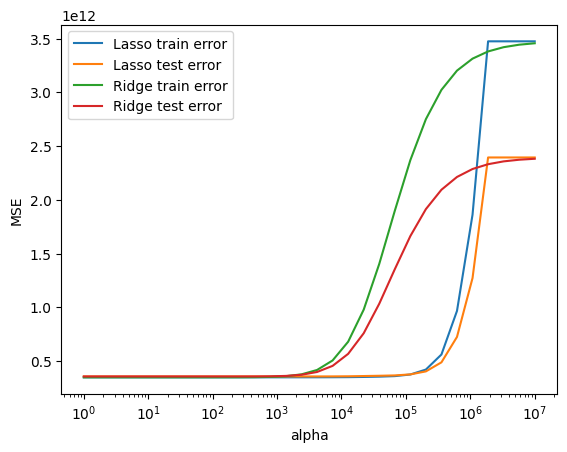

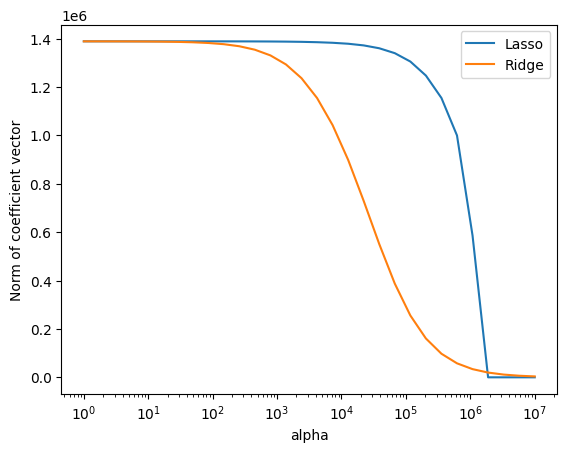

In [38]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# load the data into a pandas DataFrame
data = pd.read_csv('correlated.csv')

# split the data into a training set and a test set
if data.isnull().values.any():
    print('Warning: input data contains missing values')
    data = data.dropna()  # Drop rows with missing values

# split the data into train and test sets with 20% for the test set
X = data.drop('Likes', axis=1)
y = data['Likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the features using scikit-learn's StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create lists to store the results for each alpha value
alphas = np.logspace(0, 7, num=30)
train_errors_lasso = []
test_errors_lasso = []
coeff_norms_lasso = []
train_errors_ridge = []
test_errors_ridge = []
coeff_norms_ridge = []

# loop over the alpha values and fit Lasso and Ridge models
for alpha in alphas:
    # fit the Lasso model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    train_pred_lasso = lasso.predict(X_train)
    test_pred_lasso = lasso.predict(X_test)
    train_errors_lasso.append(mean_squared_error(y_train, train_pred_lasso))
    test_errors_lasso.append(mean_squared_error(y_test, test_pred_lasso))
    coeff_norms_lasso.append(np.linalg.norm(lasso.coef_))
    
    # fit the Ridge model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    train_pred_ridge = ridge.predict(X_train)
    test_pred_ridge = ridge.predict(X_test)
    train_errors_ridge.append(mean_squared_error(y_train, train_pred_ridge))
    test_errors_ridge.append(mean_squared_error(y_test, test_pred_ridge))
    coeff_norms_ridge.append(np.linalg.norm(ridge.coef_))

# plot the train error and test error as a function of alpha
import matplotlib.pyplot as plt
plt.semilogx(alphas, train_errors_lasso, label='Lasso train error')
plt.semilogx(alphas, test_errors_lasso, label='Lasso test error')
plt.semilogx(alphas, train_errors_ridge, label='Ridge train error')
plt.semilogx(alphas, test_errors_ridge, label='Ridge test error')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

# plot the norm of the coefficient vector as a function of alpha
plt.semilogx(alphas, coeff_norms_lasso, label='Lasso')
plt.semilogx(alphas, coeff_norms_ridge, label='Ridge')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('Norm of coefficient vector')
plt.show()


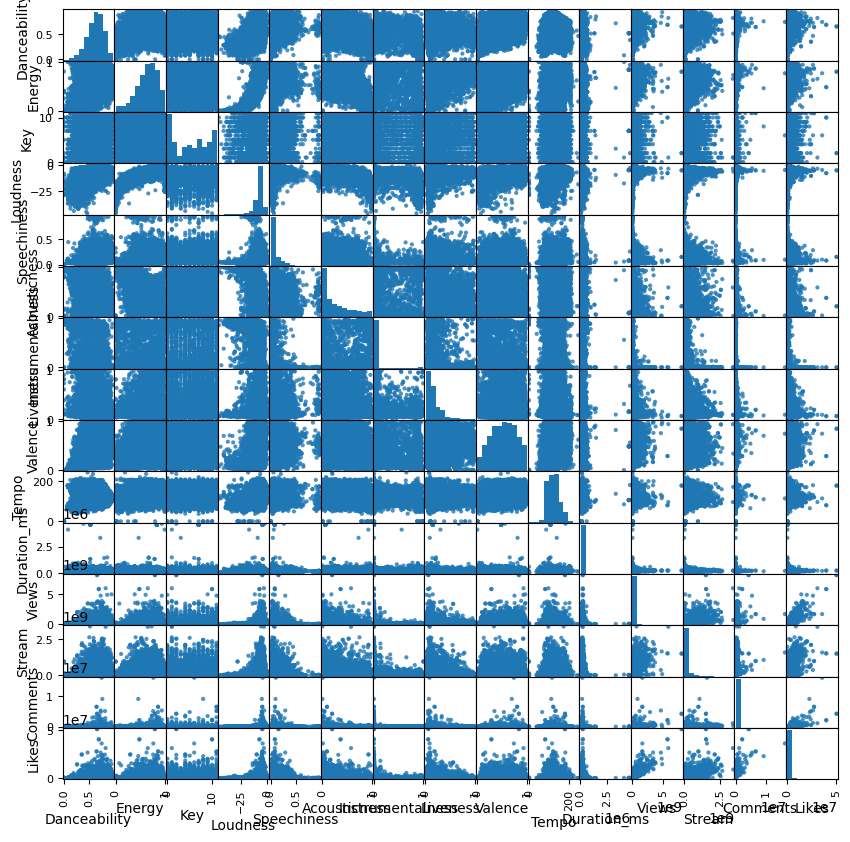

In [3]:
import matplotlib.pyplot as plt

# create scatter plot matrix
pd.plotting.scatter_matrix(data, figsize=(10, 10), alpha=0.8, diagonal='hist')


    
plt.show()


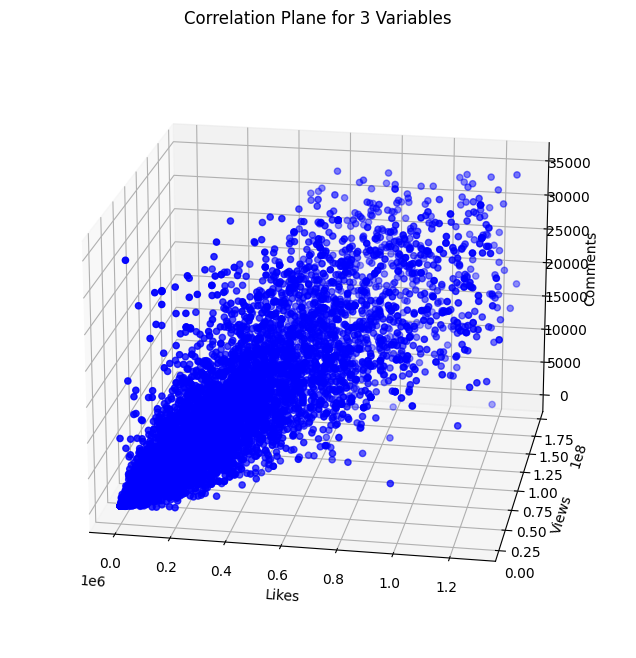

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# load the data into a pandas DataFrame
data = pd.read_csv('pops.csv')
if data.isnull().values.any():
    print('Warning: input data contains missing values')
    data = data.dropna()  
    
# remove outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
data = data[(data >= lower_bound) & (data <= upper_bound)].dropna()

# extract the three variables
likes = data['Likes']
stream = data['Views']
comments = data['Comments']

# create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# scatter plot of the data points
ax.scatter(likes, stream, comments, c='blue')

# fit a plane to the data
model = LinearRegression().fit(np.column_stack((likes, stream)), comments)
xx, yy = np.meshgrid(np.linspace(likes.min(), likes.max(), 10), np.linspace(stream.min(), stream.max(), 10))
zz = model.predict(np.column_stack((xx.flatten(), yy.flatten()))).reshape(xx.shape)


# set axis labels and title
ax.set_xlabel('Likes')
ax.set_ylabel('Views')
ax.set_zlabel('Comments')
ax.set_title('Correlation Plane for 3 Variables')

ax.view_init(elev=20, azim=-80)
# show the plot
plt.show()

# create the data for the cone
r = np.linspace(0, 1, 20)
theta = np.linspace(0, 2 * np.pi, 40)
R, THETA = np.meshgrid(r, theta)
X = R * np.cos(THETA)
Y = R * np.sin(THETA)
Z = R

# plot the cone
ax.plot_surface(X, Y, Z, alpha=0.5, color='red')



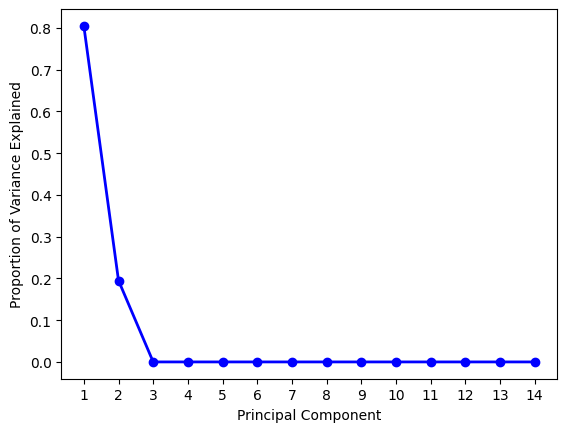

In [6]:

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()
pca.fit(X)

# plot the scree plot
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1, pca.n_components_ + 1))
plt.show()

In [4]:
import pandas as pd
import numpy as np

# Load the data from your dataset into a pandas DataFrame
df = pd.read_csv('integerData.csv')

# Filter the DataFrame to remove all rows with less than 10000 likes
df = df[df['Likes'] >= 10000]

# Create the exponential bins
min_val = 10000
max_val = 10000000
log_min = np.log10(min_val)
log_max = np.log10(max_val)
bin_edges = np.logspace(log_min, log_max, num=21, base=10)

# Create a new column in the DataFrame to store the numerical groupings
df['like_groups'] = pd.cut(df['Likes'], bins=bin_edges, labels=False) + 1

# Save the grouped data to a new CSV file
df.to_csv('grouped_data.csv', index=False)



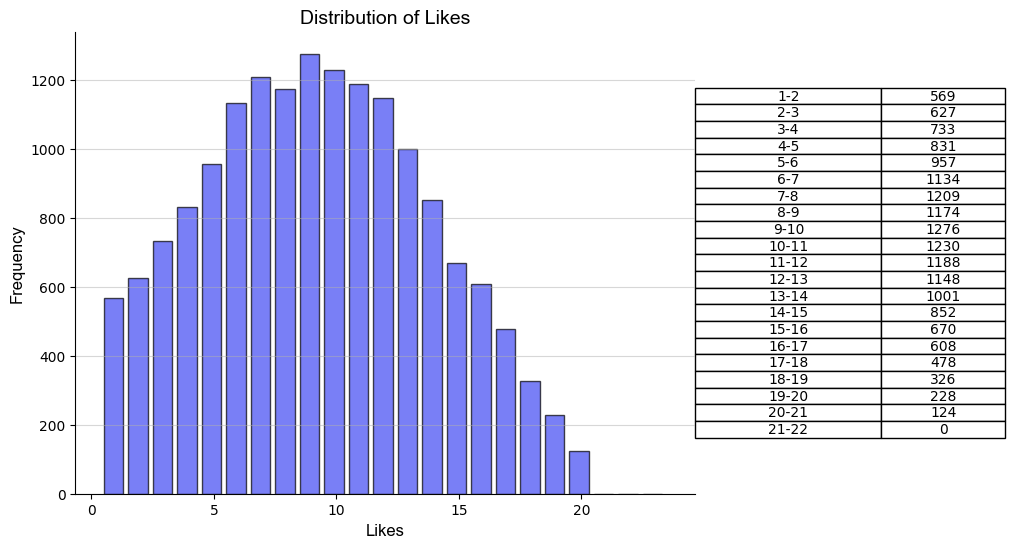

In [6]:
import matplotlib.pyplot as plt

# Create a histogram of the like_groups column with adjusted color scheme, bar width and transparency
hist, bin_edges = np.histogram(df['like_groups'], bins=range(1, 23))

fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(df['like_groups'], bins=range(1, 25), align='left', edgecolor='black', color='#4149F3', alpha=0.7, width=0.8)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create a table of the bin edges and frequencies
table_data = []
for i in range(len(bin_edges) - 1):
    table_data.append([str(bin_edges[i]) + '-' + str(bin_edges[i+1]), hist[i]])

# Add the table to the plot
ax.table(cellText=table_data, colWidths=[0.3, 0.2], cellLoc='center', loc='right')

# Set the y-axis label with a different font and add gridlines
ax.set_ylabel('Frequency', fontname='Arial', fontsize=12)
ax.grid(axis='y', alpha=0.5)

# Add axis labels and a title with a different font
ax.set_xlabel('Likes', fontname='Arial', fontsize=12)
ax.set_title('Distribution of Likes', fontname='Arial', fontsize=14)

# Show the plot
plt.show()



In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import the dataset
grouped_data = pd.read_csv("correlated.csv")

# Drop NaN values
grouped_data = grouped_data.dropna()

# Split the data into training and testing sets
X = grouped_data.drop('Likes', axis=1)
y = grouped_data['Likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load your dataset into a pandas DataFrame
data = pd.read_csv('correlated.csv')

if data.isnull().values.any():
    print('Warning: input data contains missing values')
    data = data.dropna()  # Drop rows with missing values
    
# split the data into train and test sets with 20% for the test set
X = data.drop('Likes', axis=1)
y = data['Likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize an empty set to store selected features
selected_features = set()

# initialize a dictionary to store the cross-validation error for each feature
feature_errors = {}

# initialize the model
model = LinearRegression()

# set the maximum number of features to consider
max_features = X_train.shape[1]

# iterate over features to select
for i in range(max_features):
    best_feature = None
    best_error = float('inf')
    
    # iterate over remaining features to consider
    for feature in X_train.columns:
        if feature in selected_features:
            continue
        
        # train the model on the selected features plus the feature under consideration
        features = list(selected_features) + [feature]
        model.fit(X_train[features], y_train)
        
        # compute the cross-validation error for the model
        y_pred = model.predict(X_test[features])
        error = mean_squared_error(y_test, y_pred)
        
    
        # update the best feature if the error is lower
        if error < best_error:
            best_feature = feature
            best_error = error
            
        # store the error for this feature
        feature_errors[feature] = error
    
    # add the best feature to the selected features
    selected_features.add(best_feature)
    print(f'Selected feature {i+1}: {best_feature} (error={best_error:.2f})')


Selected feature 1: Views (error=568642876676.09)
Selected feature 2: Comments (error=402613077258.28)
Selected feature 3: Stream (error=361864301009.21)
Selected feature 4: Speechiness (error=360158127905.58)
Selected feature 5: Valence (error=359334692884.63)
Selected feature 6: Danceability (error=357232221732.31)
Selected feature 7: Loudness (error=357131166342.42)
Selected feature 8: Acousticness (error=356897369171.89)
Selected feature 9: Instrumentalness (error=356780376725.68)
Selected feature 10: Energy (error=356725226995.06)
Selected feature 11: Liveness (error=356726787390.59)
Selected feature 12: Duration_ms (error=356776596177.18)
Selected feature 13: Tempo (error=356918363068.16)
Selected feature 14: Key (error=357153249559.63)


Removed feature Views (error=914970603326.98)
Removed feature Stream (error=1440486178750.69)
Removed feature Comments (error=2325686458890.37)
Removed feature Danceability (error=2342304491481.82)
Removed feature Loudness (error=2364136651030.92)
Removed feature Instrumentalness (error=2369261157343.42)
Removed feature Acousticness (error=2374215943331.54)
Removed feature Energy (error=2393216898431.94)
Removed feature Valence (error=2394385411887.53)
Removed feature Speechiness (error=2395502333408.94)
Removed feature Duration_ms (error=2395600619105.83)
Removed feature Tempo (error=2395415882386.32)
Removed feature Key (error=2395168415218.50)


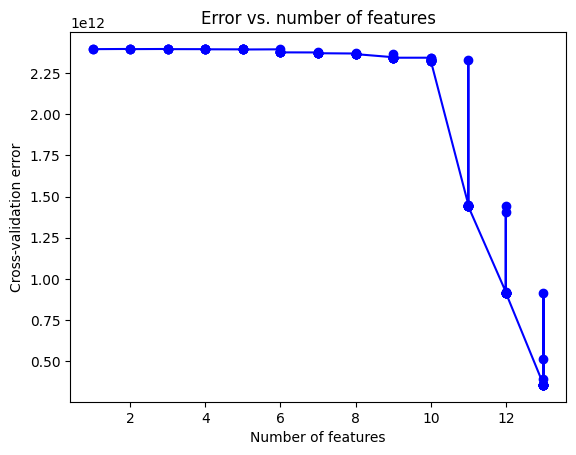

In [4]:
remaining_features = set(X_train.columns)

# initialize a dictionary to store the cross-validation error for each feature subset
subset_errors = {}

# initialize the model
model = LinearRegression()

# set the minimum number of features to consider
min_features = 1

# iterate over features to remove
for i in range(len(X_train.columns)-min_features):
    worst_feature = None
    worst_error = float('-inf')
    
    # iterate over remaining features to consider removing
    for feature in remaining_features:
        # train the model on the selected features minus the feature under consideration
        features = list(remaining_features - set([feature]))
        model.fit(X_train[features], y_train)
        
        # compute the cross-validation error for the model
        y_pred = model.predict(X_test[features])
        error = mean_squared_error(y_test, y_pred)
        
        # update the worst feature if the error is higher
        
        if error > worst_error:
            worst_feature = feature
            worst_error = error
            
        # store the error for this feature subset
        subset_errors[frozenset(features)] = error
    
    # remove the worst feature from the remaining features
    remaining_features.remove(worst_feature)
    print(f'Removed feature {worst_feature} (error={worst_error:.2f})')
    
import matplotlib.pyplot as plt

# plot the error as a function of the number of features
sorted_errors = sorted(subset_errors.items(), key=lambda x: len(x[0]))
feature_counts = [len(features) for features, error in sorted_errors]
errors = [error for features, error in sorted_errors]
plt.plot(feature_counts, errors, 'bo-')
plt.xlabel('Number of features')
plt.ylabel('Cross-validation error')
plt.title('Error vs. number of features')
plt.show()

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# load the data into a pandas DataFrame
data = pd.read_csv('grouped_data.csv')

# split the data into a training set and a test set
if data.isnull().values.any():
    print('Warning: input data contains missing values')
    data = data.dropna()  # Drop rows with missing values

# split the data into train and test sets with 20% for the test set
X = data.drop('like_groups', axis=1)
y = data['like_groups']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create a logistic regression classifier
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# train the classifier on the training data
classifier.fit(X_train, y_train)

# make predictions on the test data
y_pred = classifier.predict(X_test)

# evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.0837118754055808


In [46]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# load the data into a pandas DataFrame
data = pd.read_csv('grouped_data.csv')

# split the data into a training set and a test set
if data.isnull().values.any():
    print('Warning: input data contains missing values')
    data = data.dropna()  # Drop rows with missing values

# split the data into train and test sets with 20% for the test set
X = data.drop('like_groups', axis=1)
y = data['like_groups']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit a logistic regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)

# examine the coefficients
coef_df = pd.DataFrame({'feature': X_train.columns, 'coef': logreg.coef_[0]})
coef_df.sort_values('coef', ascending=False, inplace=True)
print(coef_df)


             feature          coef
9              Tempo  5.116362e-10
2                Key  2.021879e-11
5       Acousticness  1.363003e-11
6   Instrumentalness  9.811890e-12
8            Valence  3.887917e-12
7           Liveness  8.908984e-13
0       Danceability  1.606755e-13
4        Speechiness -9.799720e-13
1             Energy -7.571449e-12
3           Loudness -4.067890e-10
10       Duration_ms -1.164215e-06


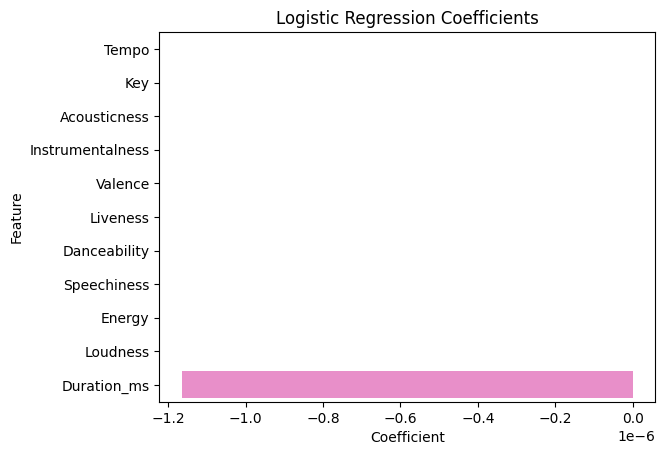

In [47]:
sns.barplot(x='coef', y='feature', data=coef_df)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


In [5]:
selected_features = set()

# initialize a dictionary to store the cross-validation error for each feature
feature_errors = {}

# initialize the model
model = LinearRegression()

# set the maximum number of features to consider
max_features = X_train.shape[1]

# iterate over features to select
for i in range(max_features):
    best_feature = None
    best_error = float('inf')
    
    # iterate over remaining features to consider
    for feature in X_train.columns:
        if feature in selected_features:
            continue
        
        # train the model on the selected features plus the feature under consideration
        features = list(selected_features) + [feature]
        model.fit(X_train[features], y_train)
        
        # compute the cross-validation error for the model
        y_pred = model.predict(X_test[features])
        error = mean_squared_error(y_test, y_pred)

        # update the best feature if the error is lower
        if error < best_error:
            best_feature = feature
            best_error = error
            
        # store the error for this feature
        feature_errors[feature] = error
    
    # add the best feature to the selected features
    selected_features.add(best_feature)
    print(f'Selected feature {i+1}: {best_feature} (error={best_error:.2f})')


Selected feature 1: Views (error=568642876676.09)
Selected feature 2: Comments (error=402613077258.28)
Selected feature 3: Stream (error=361864301009.21)
Selected feature 4: Speechiness (error=360158127905.57)
Selected feature 5: Valence (error=359334692884.77)
Selected feature 6: Danceability (error=357232221512.95)
Selected feature 7: Loudness (error=357131164633.20)
Selected feature 8: Acousticness (error=356897369187.34)
Selected feature 9: Instrumentalness (error=356780376851.89)
Selected feature 10: Energy (error=356725226222.36)
Selected feature 11: Liveness (error=356726786859.07)
Selected feature 12: Duration_ms (error=356776596211.67)
Selected feature 13: Tempo (error=356918362812.91)
Selected feature 14: Key (error=357153249713.21)


In [ ]:
remaining_features = set(X_train.columns)

# initialize a dictionary to store the cross-validation error for each feature subset
subset_errors = {}

# initialize the model
model = LinearRegression()

# set the minimum number of features to consider
min_features = 1

# iterate over features to remove
for i in range(len(X_train.columns)-min_features):
    worst_feature = None
    worst_error = float('-inf')
    
    # iterate over remaining features to consider removing
    for feature in remaining_features:
        # train the model on the selected features minus the feature under consideration
        features = list(remaining_features - set([feature]))
        model.fit(X_train[features], y_train)
        
        # compute the cross-validation error for the model
        y_pred = model.predict(X_test[features])
        error = mean_squared_error(y_test, y_pred)
        
        # update the worst feature if the error is higher
        if error > worst_error:
            worst_feature = feature
            worst_error = error
            
        # store the error for this feature subset
        subset_errors[frozenset(features)] = error
    
    # remove the worst feature from the remaining features
    remaining_features.remove(worst_feature)
    print(f'Removed feature {worst_feature} (error={worst_error:.2f})')
    
import matplotlib.pyplot as plt

# plot the error as a function of the number of features
sorted_errors = sorted(subset_errors.items(), key=lambda x: len(x[0]))
feature_counts = [len(features) for features, error in sorted_errors]
errors = [error for features, error in sorted_errors]
plt.plot(feature_counts, errors, 'bo-')
plt.xlabel('Number of features')
plt.ylabel('Cross-validation error')
plt.title('Error vs. number of features')
plt.show()

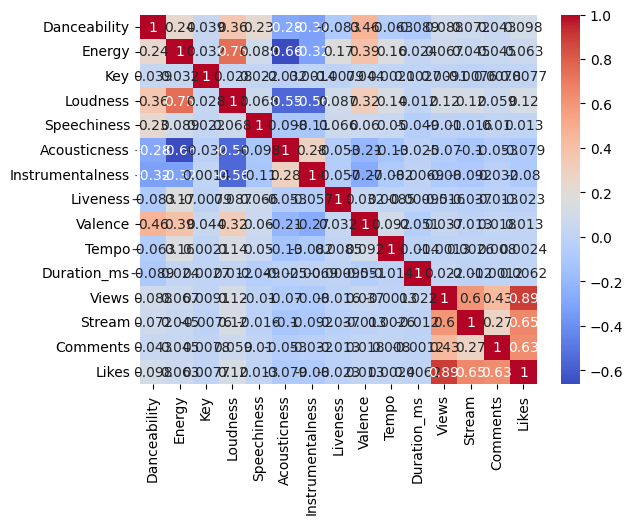

In [6]:
import pandas as pd
import seaborn as sns

# Load the data
grouped_data = pd.read_csv("correlated.csv")
grouped_data = grouped_data.dropna()

# Create a correlation matrix
corr_matrix = grouped_data.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Show the plot
plt.show()



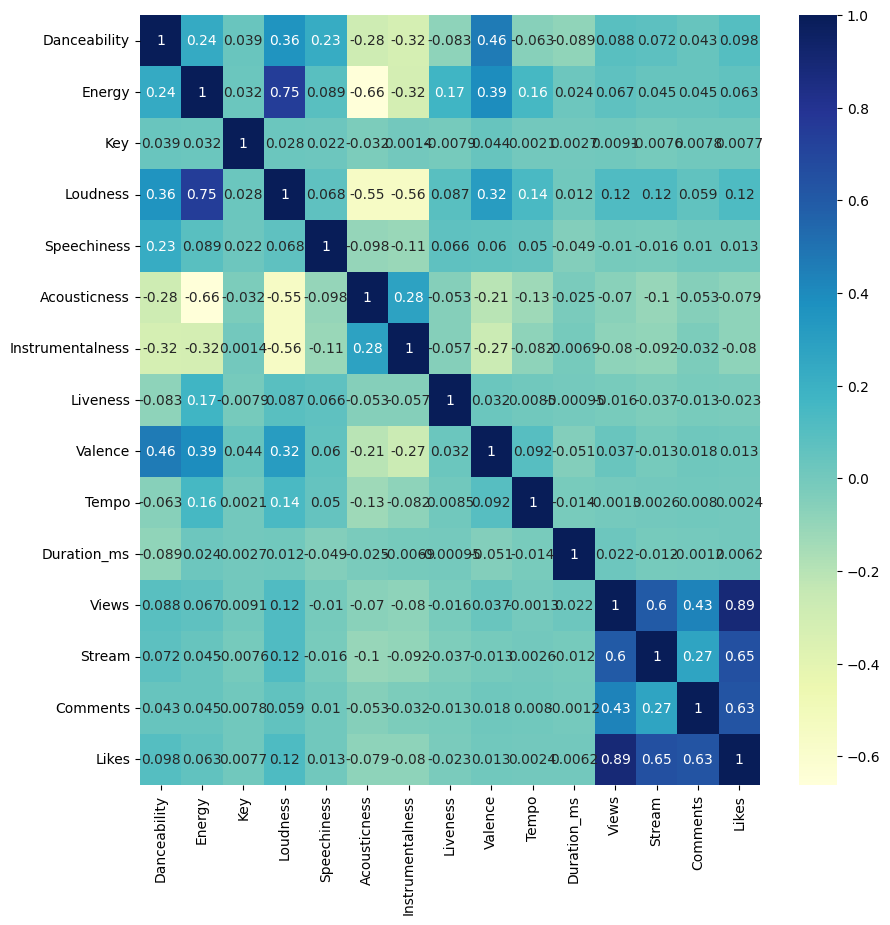

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import the dataset
grouped_data = pd.read_csv("correlated.csv")

# Drop NaN values
grouped_data = grouped_data.dropna()

# Create correlation matrix
corr_matrix = grouped_data.corr()

# Create heatmap using seaborn
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", ax=ax)

# Show plot
plt.show()


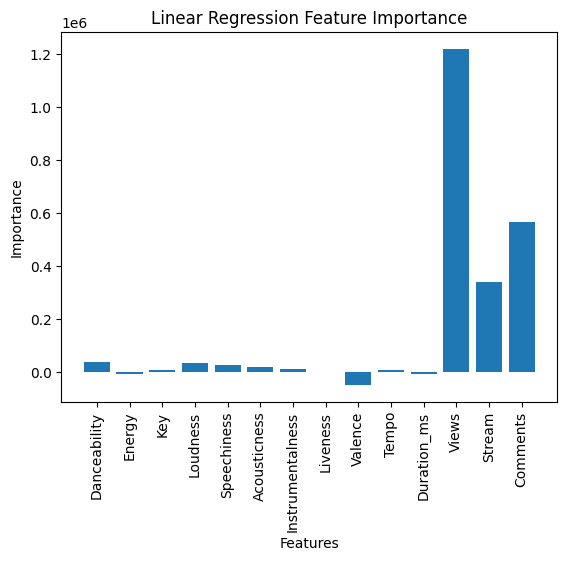

In [118]:
import matplotlib.pyplot as plt

# Train the Linear Regression model on the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Get the coefficients of the features
feature_importance = lr_model.coef_

# Plot the feature importance graph
plt.bar(X.columns, feature_importance)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Linear Regression Feature Importance")
plt.show()


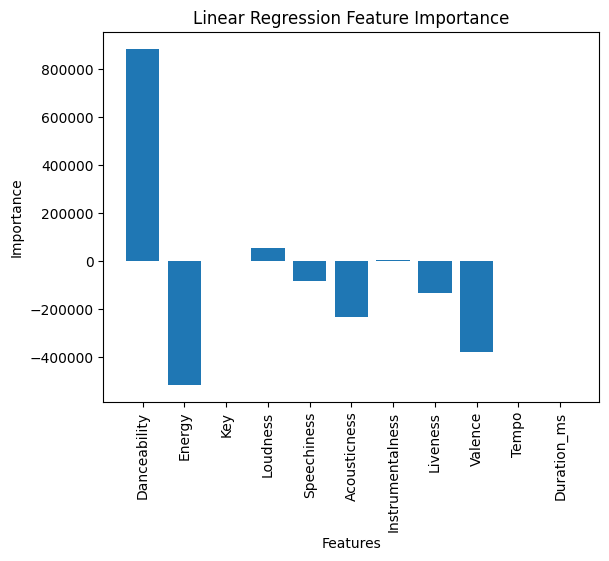

In [121]:
import matplotlib.pyplot as plt


grouped_data = pd.read_csv("integerData.csv")

# Drop NaN values
grouped_data = grouped_data.dropna()

# Split the data into training and testing sets
X = grouped_data.drop('Likes', axis=1)
y = grouped_data['Likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model on the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Get the coefficients of the features
feature_importance = lr_model.coef_

# Plot the feature importance graph
plt.bar(X.columns, feature_importance)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Linear Regression Feature Importance")
plt.show()


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Import the dataset
grouped_data = pd.read_csv("correlated.csv")

# Drop NaN values
grouped_data = grouped_data.dropna()

# Split the data into training and testing sets
X = grouped_data.drop('Likes', axis=1)
y = grouped_data['Likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selected_features = set()

# initialize a dictionary to store the cross-validation error for each feature
feature_errors = {}

# initialize the model
model = LinearRegression()

# set the maximum number of features to consider
max_features = X_train.shape[1]

# iterate over features to select
for i in range(max_features):
    best_feature = None
    best_error = float('inf')
    
    # iterate over remaining features to consider
    for feature in X_train.columns:
        if feature in selected_features:
            continue
        
        # train the model on the selected features plus the feature under consideration
        features = list(selected_features) + [feature]
        model.fit(X_train[features], y_train)
        
        # compute the cross-validation error for the model
        y_pred = model.predict(X_test[features])
        error = mean_squared_error(y_test, y_pred)

        # update the best feature if the error is lower
        if error < best_error:
            best_feature = feature
            best_error = error
            
        # store the error for this feature
        feature_errors[feature] = error
    
    # add the best feature to the selected features
    selected_features.add(best_feature)
    print(f'Selected feature {i+1}: {best_feature} (error={best_error:.2f})')

    # stop iterating if we have selected 4 features
    if len(selected_features) == 4:
        break

# Convert the selected features set to a list and save the best 4 features in a table
best_features = list(selected_features)[:4]
table = pd.DataFrame({'Best 4 Features': best_features})
table.to_csv('best_4_features.csv', index=False)
print(table)


Selected feature 1: Views (error=568642876676.09)
Selected feature 2: Comments (error=402613077258.28)
Selected feature 3: Stream (error=361864301009.21)
Selected feature 4: Speechiness (error=360158127905.57)
  Best 4 Features
0     Speechiness
1        Comments
2           Views
3          Stream


Learning rate set to 0.057032
0:	learn: 297924.3240164	total: 3.06ms	remaining: 3.05s
1:	learn: 297380.9304142	total: 5.71ms	remaining: 2.85s
2:	learn: 296804.4764398	total: 7.94ms	remaining: 2.64s
3:	learn: 296350.1363545	total: 10.1ms	remaining: 2.52s
4:	learn: 295833.2289884	total: 12.4ms	remaining: 2.47s
5:	learn: 295389.3450255	total: 14.9ms	remaining: 2.46s
6:	learn: 294951.8155097	total: 17.2ms	remaining: 2.44s
7:	learn: 294605.0834831	total: 19.7ms	remaining: 2.44s
8:	learn: 294255.7763554	total: 21.9ms	remaining: 2.42s
9:	learn: 294013.3573742	total: 24.6ms	remaining: 2.44s
10:	learn: 293688.9980961	total: 26.9ms	remaining: 2.42s
11:	learn: 293396.1023523	total: 29.3ms	remaining: 2.41s
12:	learn: 293143.5592836	total: 31.3ms	remaining: 2.38s
13:	learn: 292887.5560980	total: 34ms	remaining: 2.4s
14:	learn: 292604.9522617	total: 36.7ms	remaining: 2.41s
15:	learn: 292366.7099625	total: 39.1ms	remaining: 2.4s
16:	learn: 292062.1544632	total: 41.3ms	remaining: 2.38s
17:	learn: 2917

145:	learn: 274539.9320454	total: 371ms	remaining: 2.17s
146:	learn: 274435.7841649	total: 373ms	remaining: 2.17s
147:	learn: 274359.2516507	total: 376ms	remaining: 2.16s
148:	learn: 274194.6659700	total: 378ms	remaining: 2.16s
149:	learn: 274103.2397588	total: 381ms	remaining: 2.16s
150:	learn: 274001.8122341	total: 384ms	remaining: 2.16s
151:	learn: 273869.1994074	total: 388ms	remaining: 2.16s
152:	learn: 273786.2765320	total: 391ms	remaining: 2.16s
153:	learn: 273645.8430052	total: 394ms	remaining: 2.17s
154:	learn: 273594.7865411	total: 397ms	remaining: 2.16s
155:	learn: 273482.5961359	total: 399ms	remaining: 2.16s
156:	learn: 273384.8406154	total: 403ms	remaining: 2.16s
157:	learn: 273215.6533153	total: 406ms	remaining: 2.16s
158:	learn: 273077.5185119	total: 408ms	remaining: 2.16s
159:	learn: 272994.3036266	total: 410ms	remaining: 2.15s
160:	learn: 272885.1471995	total: 413ms	remaining: 2.15s
161:	learn: 272798.7623332	total: 415ms	remaining: 2.15s
162:	learn: 272713.8663720	tota

299:	learn: 258748.2120104	total: 781ms	remaining: 1.82s
300:	learn: 258683.2858156	total: 788ms	remaining: 1.83s
301:	learn: 258571.1284816	total: 791ms	remaining: 1.83s
302:	learn: 258431.3958016	total: 797ms	remaining: 1.83s
303:	learn: 258347.5987240	total: 802ms	remaining: 1.84s
304:	learn: 258237.1854571	total: 808ms	remaining: 1.84s
305:	learn: 258148.4498764	total: 812ms	remaining: 1.84s
306:	learn: 258061.5462343	total: 816ms	remaining: 1.84s
307:	learn: 257925.0122404	total: 818ms	remaining: 1.84s
308:	learn: 257815.6117207	total: 821ms	remaining: 1.84s
309:	learn: 257732.3603006	total: 826ms	remaining: 1.84s
310:	learn: 257637.7606030	total: 829ms	remaining: 1.84s
311:	learn: 257540.6100383	total: 833ms	remaining: 1.84s
312:	learn: 257435.3829521	total: 838ms	remaining: 1.84s
313:	learn: 257318.0212105	total: 842ms	remaining: 1.84s
314:	learn: 257231.2367245	total: 846ms	remaining: 1.84s
315:	learn: 257146.9179265	total: 850ms	remaining: 1.84s
316:	learn: 257028.1749729	tota

451:	learn: 245111.2109347	total: 1.39s	remaining: 1.68s
452:	learn: 245015.0548000	total: 1.39s	remaining: 1.68s
453:	learn: 244951.8787787	total: 1.39s	remaining: 1.68s
454:	learn: 244889.3484083	total: 1.4s	remaining: 1.67s
455:	learn: 244778.0053162	total: 1.4s	remaining: 1.67s
456:	learn: 244671.0740366	total: 1.4s	remaining: 1.67s
457:	learn: 244585.8578586	total: 1.41s	remaining: 1.66s
458:	learn: 244500.5992674	total: 1.41s	remaining: 1.66s
459:	learn: 244377.9288091	total: 1.41s	remaining: 1.66s
460:	learn: 244304.0090785	total: 1.42s	remaining: 1.66s
461:	learn: 244219.1281226	total: 1.42s	remaining: 1.65s
462:	learn: 244114.1293243	total: 1.42s	remaining: 1.65s
463:	learn: 243986.5989494	total: 1.43s	remaining: 1.65s
464:	learn: 243906.0030084	total: 1.43s	remaining: 1.65s
465:	learn: 243821.1712268	total: 1.44s	remaining: 1.64s
466:	learn: 243748.4073567	total: 1.44s	remaining: 1.64s
467:	learn: 243667.8508061	total: 1.44s	remaining: 1.64s
468:	learn: 243577.4431202	total: 

660:	learn: 228859.2973955	total: 1.97s	remaining: 1.01s
661:	learn: 228809.1602622	total: 1.97s	remaining: 1.01s
662:	learn: 228756.8388766	total: 1.97s	remaining: 1s
663:	learn: 228685.0067571	total: 1.98s	remaining: 1s
664:	learn: 228617.7238846	total: 1.98s	remaining: 997ms
665:	learn: 228534.5536411	total: 1.98s	remaining: 994ms
666:	learn: 228421.2658451	total: 1.99s	remaining: 991ms
667:	learn: 228384.2386229	total: 1.99s	remaining: 988ms
668:	learn: 228328.3697659	total: 1.99s	remaining: 985ms
669:	learn: 228273.2416940	total: 1.99s	remaining: 982ms
670:	learn: 228225.3472219	total: 2s	remaining: 979ms
671:	learn: 228166.9362488	total: 2s	remaining: 976ms
672:	learn: 228091.8335949	total: 2s	remaining: 973ms
673:	learn: 227983.3043669	total: 2s	remaining: 970ms
674:	learn: 227935.5764966	total: 2.01s	remaining: 967ms
675:	learn: 227833.4899071	total: 2.01s	remaining: 964ms
676:	learn: 227771.5768549	total: 2.01s	remaining: 961ms
677:	learn: 227706.8122624	total: 2.02s	remaining

819:	learn: 218366.5869886	total: 2.36s	remaining: 518ms
820:	learn: 218299.7649067	total: 2.36s	remaining: 515ms
821:	learn: 218189.6585824	total: 2.37s	remaining: 512ms
822:	learn: 218124.9173736	total: 2.37s	remaining: 509ms
823:	learn: 218076.0764606	total: 2.37s	remaining: 507ms
824:	learn: 218022.1072994	total: 2.37s	remaining: 504ms
825:	learn: 217961.6102903	total: 2.38s	remaining: 501ms
826:	learn: 217914.3295086	total: 2.38s	remaining: 498ms
827:	learn: 217848.3787852	total: 2.38s	remaining: 495ms
828:	learn: 217778.5536424	total: 2.39s	remaining: 492ms
829:	learn: 217666.8634354	total: 2.39s	remaining: 489ms
830:	learn: 217590.3271528	total: 2.39s	remaining: 486ms
831:	learn: 217525.2443109	total: 2.39s	remaining: 483ms
832:	learn: 217466.5578135	total: 2.4s	remaining: 480ms
833:	learn: 217418.6047688	total: 2.4s	remaining: 478ms
834:	learn: 217366.7259755	total: 2.4s	remaining: 475ms
835:	learn: 217321.9522499	total: 2.4s	remaining: 472ms
836:	learn: 217254.1676933	total: 2

969:	learn: 208751.3649409	total: 2.77s	remaining: 85.5ms
970:	learn: 208674.7241769	total: 2.77s	remaining: 82.7ms
971:	learn: 208614.4374712	total: 2.77s	remaining: 79.9ms
972:	learn: 208541.5251225	total: 2.77s	remaining: 77ms
973:	learn: 208446.4361848	total: 2.78s	remaining: 74.2ms
974:	learn: 208424.7008690	total: 2.78s	remaining: 71.3ms
975:	learn: 208370.7604655	total: 2.78s	remaining: 68.5ms
976:	learn: 208337.5534336	total: 2.79s	remaining: 65.6ms
977:	learn: 208257.0242917	total: 2.79s	remaining: 62.8ms
978:	learn: 208193.3357255	total: 2.79s	remaining: 59.9ms
979:	learn: 208120.1630544	total: 2.8s	remaining: 57.1ms
980:	learn: 208044.8844922	total: 2.8s	remaining: 54.2ms
981:	learn: 207976.6086289	total: 2.8s	remaining: 51.4ms
982:	learn: 207946.8426339	total: 2.81s	remaining: 48.5ms
983:	learn: 207850.1879332	total: 2.81s	remaining: 45.7ms
984:	learn: 207769.7022442	total: 2.81s	remaining: 42.8ms
985:	learn: 207680.3025304	total: 2.81s	remaining: 40ms
986:	learn: 207634.88

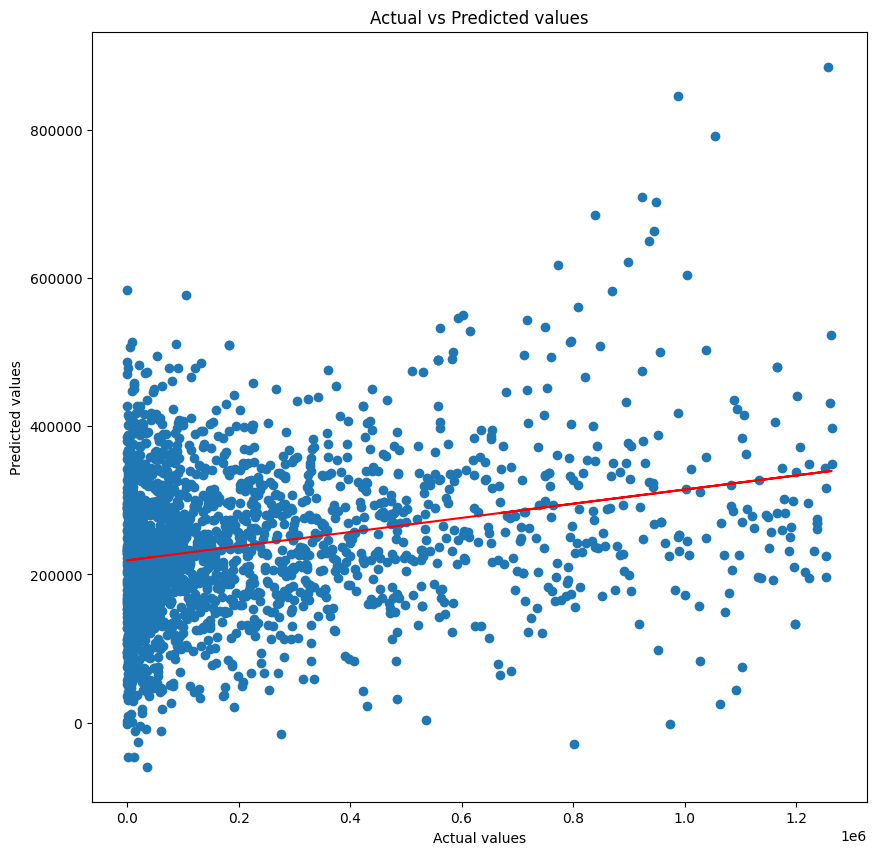

In [5]:
from catboost import CatBoostRegressor

# load your dataset into a pandas DataFrame
data = pd.read_csv('IntegerData.csv')

# calculate the IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# determine the fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# identify outliers
outliers = ((data < lower_fence) | (data > upper_fence)).any(axis=1)

# remove outliers from the dataset
data = data[~outliers]

if data.isnull().values.any():
    print('Warning: input data contains missing values')
    data = data.dropna()  # Drop rows with missing values

# split the data into train and test sets with 20% for the test set
X = data.drop('Likes', axis=1)
y = data['Likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)




# print accuracy
print('Accuracy: ', model.score(X_test, y_test))
mse = np.mean((y_pred - y_test)**2)
print('MSE: ', mse)
# print mse


# plot predicted versus actual
# plt.figure(figsize=(10, 10))
# plt.title('Predicted vs Actual CatBoostRegressor')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.scatter(y_test, preds, color='blue')


slope, intercept = np.polyfit(y_test, y_pred, 1)
regression_line = slope*y_test + intercept


# Plot the scatter plot and regression line
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred)
plt.plot(y_test, regression_line, color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()
